# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 06.10.2021

Мягкий дедлайн: 23:59MSK 25.10.2021

Жесткий дедлайн: 23:59MSK 28.10.2021

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random

In [2]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2021-10-26 18:54:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  21.7MB/s    in 10s     

2021-10-26 18:54:29 (20.1 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [3]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.6

In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [5]:
from sklearn.preprocessing import StandardScaler

# стандартизируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.reshape(len(y_train), 1))[:,0]
y_test_scaled = scaler.transform(y_test.reshape(len(y_test), 1))[:,0]

In [6]:
scale = scaler.scale_.item()
scale

10.939755150678016

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# обучаем Ridge регрессию и считаем её качество
ridge = Ridge(alpha=0.01)
ridge_results = ridge.fit(X_train_scaled, y_train)
y_test_predict = ridge_results.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("The model performance for testing set")
print("--------------------------------------")
print("RMSE = %.4f" % rmse)

The model performance for testing set
--------------------------------------
RMSE = 9.5102


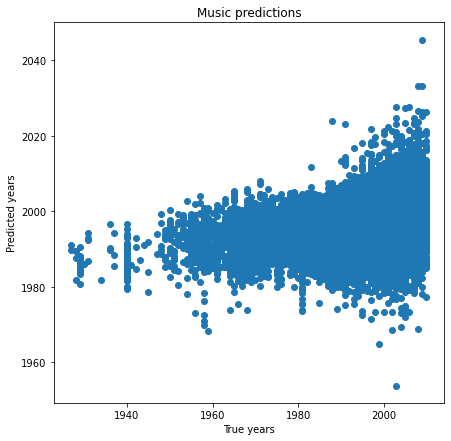

In [8]:
import matplotlib.pyplot as plt
# строим график наших предсказаний и реальных значений на тестовом наборе данных
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_test_predict)

plt.xlabel('True years', fontsize=10)
plt.ylabel('Predicted years', fontsize=10)
plt.title("Music predictions")
plt.show()

In [9]:
from sklearn.dummy import DummyRegressor

# оцениваем качество для лучшего константного прогноза (среднее значение)
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train_scaled, y_train)
y_pred_dummy = dummy_regressor.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
print("The model performance for testing set")
print("--------------------------------------")
print("RMSE = %.4f" % rmse)

The model performance for testing set
--------------------------------------
RMSE = 10.8525


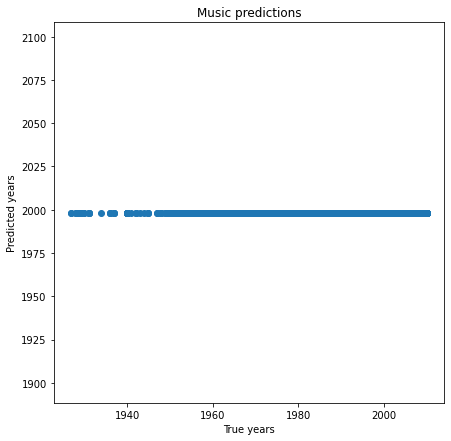

In [10]:
# строим график предсказания константой(средним) vs реальных значений
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_dummy)

plt.xlabel('True years', fontsize=10)
plt.ylabel('Predicted years', fontsize=10)
plt.title("Music predictions")
plt.show()

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [11]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [12]:
# фиксируем random seed
set_random_seed(15)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [13]:
import torchvision
from torch import optim
from tqdm.auto import tqdm

In [14]:
pip install wandb

     |████████████████████████████████| 1.7 MB 3.9 MB/s 
     |████████████████████████████████| 97 kB 6.8 MB/s 
     |████████████████████████████████| 180 kB 55.2 MB/s 
     |████████████████████████████████| 139 kB 37.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=a7a2a541b201b7d76b7a13dd9bece029ca506875d39db48ded24548ba4d7ce36
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=ae1ae236c58e41f0bf1d4150ff1ba62fbd8e45e91b5e664b395b3f6f5b62c8fb
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [15]:
class MyMusicDataset(torch.utils.data.Dataset):
    """
    Music dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # idx - номер элемента
    def __getitem__(self, idx):
         return torch.tensor(self.x[idx, :], dtype=torch.float), torch.tensor(self.y[idx], dtype=torch.float)

In [16]:
class ModelBaseline(nn.Module):
    def __init__(self):
        super(ModelBaseline, self).__init__()
        self.block1 = nn.Sequential(
          nn.Linear(90, 100),       # линейный слой
          nn.ReLU(),                # функция активации
          nn.Dropout(0.2)           # для борьбы с переобучением
        )
        self.block2 = nn.Sequential(
          nn.Linear(100, 50),       
          nn.ReLU(),           
          nn.Dropout(0.2)
        )

        self.block3 = nn.Sequential(
          nn.Linear(50, 20),      
          nn.ReLU(),
          nn.Dropout(0.2)
        )
        self.block4 = nn.Sequential(
          nn.Linear(20, 1)
        )
        
        self.net = nn.Sequential(
        self.block1,      
        self.block2,
        self.block3,
        self.block4      
        )
        
    def forward(self, x1):
        return self.net(x1) 

In [18]:
train_set = MyMusicDataset(X_train_scaled, y_train_scaled)
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=128
)
test_set = MyMusicDataset(X_test_scaled, y_test_scaled)
test_loader = torch.utils.data.DataLoader(
    test_set, 
    batch_size=128
)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ModelBaseline().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
import wandb
wandb.login()
wandb.init(project="hw1_colab")
wandb.watch(model);

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: innakysarat (use `wandb login --relogin` to force relogin)


In [19]:
def rmse(mse):
  return np.sqrt(mse) * scale

In [20]:
def train(model, optimizer, criterion, train_loader, test_loader):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    model.train()
    train_loss = 0
    train_size = 0
    for x_train, y_train in tqdm(train_loader, desc=f"Training", leave=False):
        x_train, y_train = x_train.to(device=device, non_blocking=True), y_train.to(device=device, non_blocking=True).resize_(len(y_train), 1)
            
        optimizer.zero_grad()
        y_pred = model(x_train)  # -> model.forward(x=x_train)

        loss = criterion(y_pred, y_train) 
        loss.backward()
        optimizer.step()
            
        train_loss += loss.item()
        train_size += 1 
        
    # смотрим на графики    
    wandb.log({
      'Train loss': rmse(train_loss / train_size)
        })
    print('Train loss: {loss}'.format(
             loss = rmse(train_loss / train_size)
    ))

def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    val_loss = 0
    val_size = 0
    model.eval()
    with torch.no_grad():
        for x_test, y_test in tqdm(test_loader, desc=f"Validating", leave=False):
            x_test, y_test = x_test.to(device=device, non_blocking=True),  y_test.to(device=device, non_blocking=True).resize_(len(y_test), 1)
            y_pred = model(x_test)

            loss = criterion(y_pred, y_test)
            val_loss += loss.item()
            val_size += 1
            
    #смотрим на графики
    wandb.log({
      'Val loss': rmse(val_loss / val_size)
    })
   
    print('Val loss: {loss}'.format(
          loss = rmse(val_loss / val_size)
    ))
    predicts = torch.ones(len(test_loader.dataset))
    return predicts

In [21]:
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 11.009338494815653


In [22]:
NUM_EPOCH = 50
for epoch in range(NUM_EPOCH):
  print(f'Epoch:', epoch + 1)
  train(model, optimizer, criterion, train_loader, test_loader)
  test(model, criterion, test_loader)

Epoch: 1


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 9.98348620848796


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 9.24396705022977
Epoch: 2


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 9.37782999201464


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 9.08974673109327
Epoch: 3


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 9.247595541919221


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 9.024657354247466
Epoch: 4


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 9.168332528916913


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.983254059469179
Epoch: 5


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 9.112380052057393


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.951384998969163
Epoch: 6


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 9.065546350014193


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.931630775580528
Epoch: 7


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 9.02714812689667


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.913895269355416
Epoch: 8


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 9.002836718826297


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.892634560467865
Epoch: 9


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.96929157250591


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.88332870430232
Epoch: 10


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.955618990979227


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.870822652643934
Epoch: 11


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.935078193068112


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.861650204451543
Epoch: 12


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.913794881428272


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.851998313812887
Epoch: 13


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.898940661566384


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.841497578725606
Epoch: 14


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.878010476973083


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.840760819090677
Epoch: 15


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.869859045706793


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.838096391097215
Epoch: 16


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.857438012276063


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.82726433237798
Epoch: 17


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.847144226016718


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.821582533696862
Epoch: 18


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.838829441666421


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.817331902476722
Epoch: 19


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.824415768914035


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.815854852544268
Epoch: 20


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.820028352907459


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.80994445163685
Epoch: 21


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.813746702067515


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.805768010358427
Epoch: 22


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.801810399732501


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.800631134721922
Epoch: 23


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.794694411718913


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.798879348279542
Epoch: 24


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.784750116576978


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.798475155170548
Epoch: 25


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.777860669497125


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.792403073423689
Epoch: 26


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.774640229612732


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.786938490283713
Epoch: 27


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.767460965944952


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.787132767787808
Epoch: 28


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.762083806763147


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.789821815734243
Epoch: 29


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.751268173365673


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.785478703125147
Epoch: 30


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.75337860362557


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.782646779127036
Epoch: 31


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.739448756834697


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.785871735696325
Epoch: 32


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.739800076665887


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.777062551124075
Epoch: 33


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.729225791855606


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.77904801939487
Epoch: 34


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.724171967096522


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.776280604969791
Epoch: 35


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.72061209291735


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.778041334634315
Epoch: 36


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.722050868703615


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.77688809804808
Epoch: 37


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.712482457451271


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.782544046408853
Epoch: 38


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.708239627724428


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.771925013698382
Epoch: 39


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.700934200359011


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.77173131487651
Epoch: 40


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.699583811249132


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.77128644146173
Epoch: 41


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.700983969270727


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.769087905694857
Epoch: 42


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.68560406324236


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.766853217306155
Epoch: 43


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.69113741201547


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.764831510091765
Epoch: 44


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.681798511152124


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.76652406012713
Epoch: 45


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.686172598024433


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.764515734940922
Epoch: 46


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.675429441789875


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.769422553993284
Epoch: 47


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.674564570769464


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.76484840328941
Epoch: 48


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.675244827235156


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.766557918895
Epoch: 49


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.669783262527442


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.761793545661734
Epoch: 50


Training:   0%|          | 0/3623 [00:00<?, ?it/s]

Train loss: 8.662709720311712


Validating:   0%|          | 0/404 [00:00<?, ?it/s]

Val loss: 8.762408892099161


## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

Было проведено более 10 экспериментов для подбора гиперпараметров, которые давали бы нужное качество.
<br>
Прежде всего, была произведена первичная подготовка данных - они были стандартизованы
<br>
Архитектура сети, на которой я остановилась, состоит из 4 "блоков" (условное разделение): 1) линейный слой(90-100), функция активации ReLU, dropout(0.2), 2) линейный слой(100-50), функция активации ReLU, dropout(0.2), 3) линейный слой(50-20), функция активации ReLU, dropout(0.2), 4) линейный слой(20-1)
<br>
В качестве оптимизатора выбран Адам с lr = 0.0001
<br>
Batch_size = 128
<br>
num_epoch = 50
<br>
Полученный RMSE на тесте: 8.762
<br>
Графики train loss и val loss, построенные автоматически в wandb:
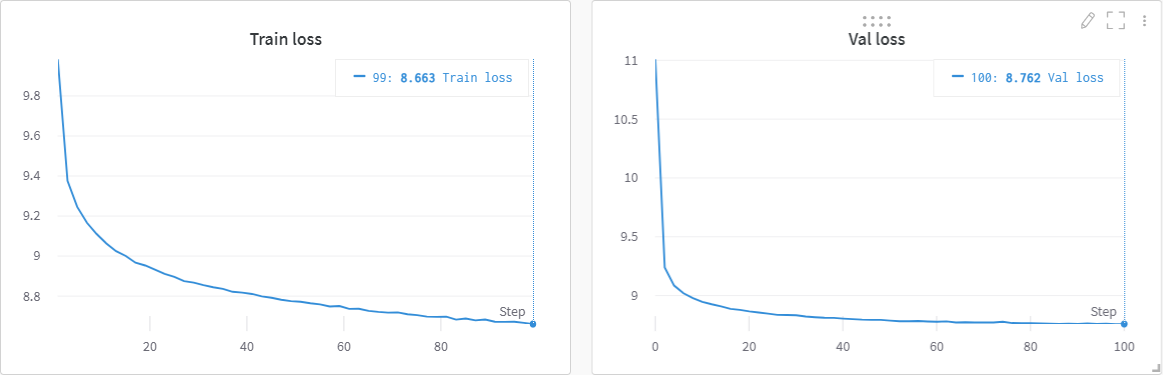



Один из начальных экспериментов имел такую архитектуру:
линейный (90->100), relu, dropout(0.1), линейный(100->30), relu, dropout(0.1), линейный слой(30->1); batch_size = 64; num_epoch = 35; оптимизатор - SGD(lr=0.001, momentum = 0.9)
Такая архитектура давала не очень хорошее качество (более 8.8) и на графиках заметно переобучение
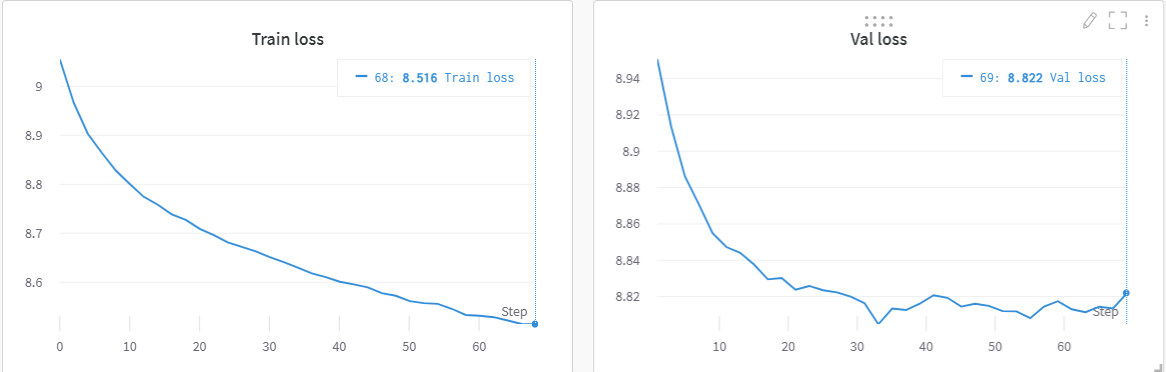

Так как я заметила переобучение, то решила изначально менять значение для dropout (на 0.2; 0.3; 0.4), но лучшее качество достигалось при 0.1 и 0.2 (качество +- одинаковое), а с увеличением значения dropout качество падало. Затем я пробовала менять кол-во нейронов на выходе линейных слоев (90->100->30->1; 90->100->40->1; 90->110->55->1 и другое), но особых отличий в качестве не наблюдалось (разница в тысячных)
<br>
Значительное улучшение случилось при смене оптимизатора с SGD на Adam с lr = 0.0005 и batch_size с 64 на 128
<br>
Ниже представлены графики при смене оптимизатора на Adam с lr = 0.0005 и batch_size=128 
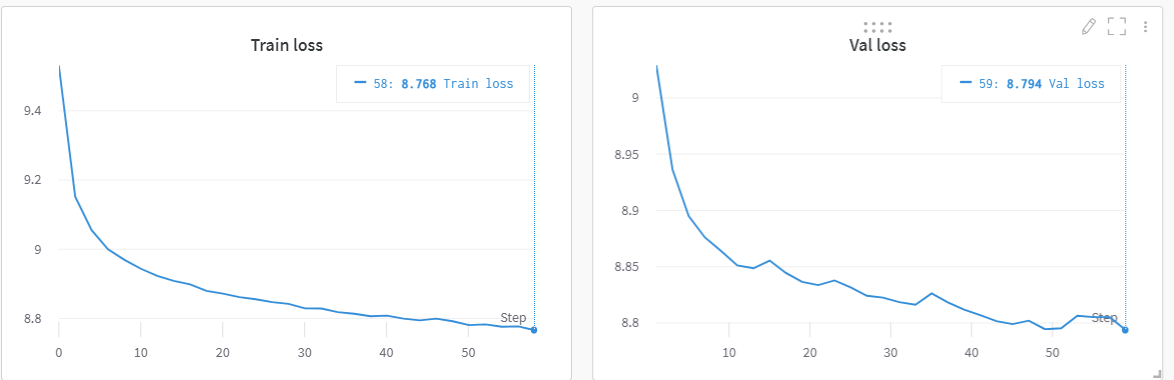


Затем я решила добавить ещё один "блок", и тогда архитектура стала выглядеть так:
1) линейный слой(90-120), нелинейность, дропаут, 2) линейный слой(120-50), нелинейность, дропаут, 3) линейный слой(50-20), нелинейность, дропаут, 4) линейный слой(20-1)
Графики для 4 "блоков" и lr для Adam (изменила с 0.0005 на 0.0001)
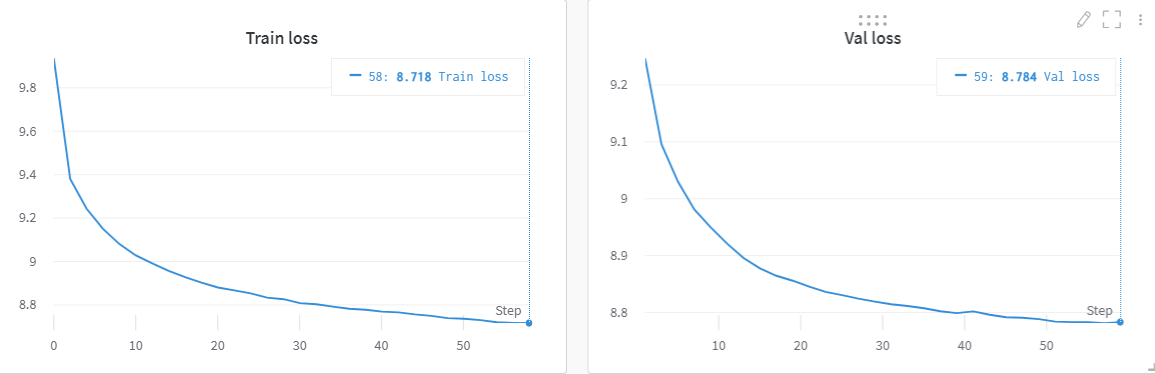


Я также пробовала менять значения dropout при такой архитектуре сети
<br>
Например, вот графики для dropout 0.4/0.3/0.1 
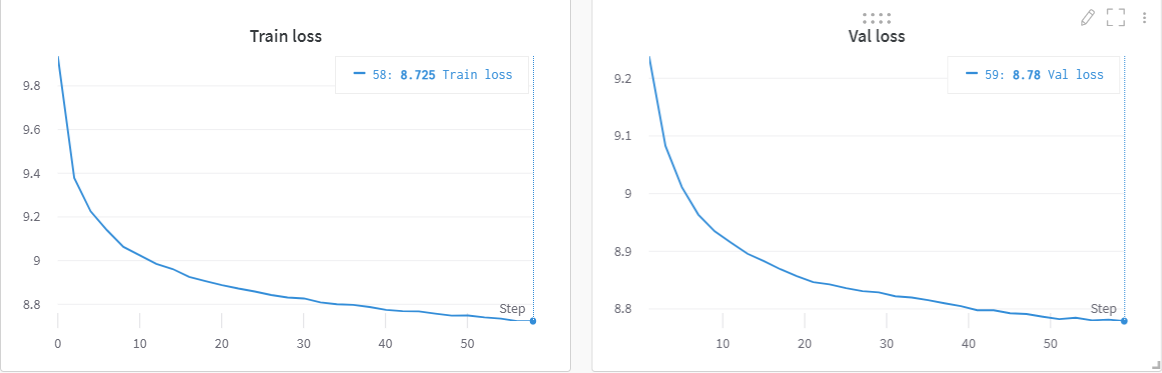

При смене значений dropout на 0.2/0.2/0.1 и увеличении числа эпох (до этого было 30-35, стало 40, так как значение не успевало дойти до желаемой цифры качества) качество улучшилось (с 8.78 на 8.768) 
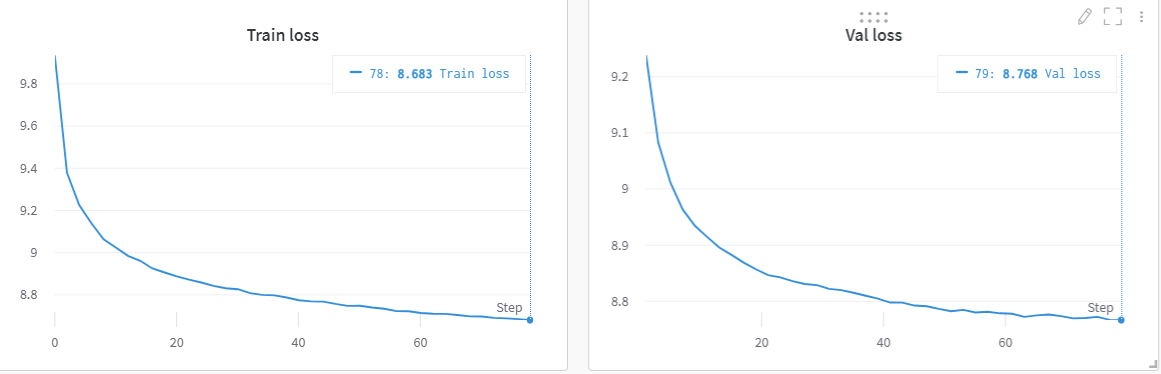

Также я меняла функции активации, качество почти не отличалось (разница в тысячных)
<br>
Для примера 1 график - комбинация LeakyReLU, LeakyReLU, ReLU
<br>
2 график - ReLU, ReLU, LeakyReLU (качество лучше) 
<br>
Также видно, что в этих экспериментах я также изменила количество эпох до 50, чтобы сеть успевала обучиться и дала нужное качество на тесте
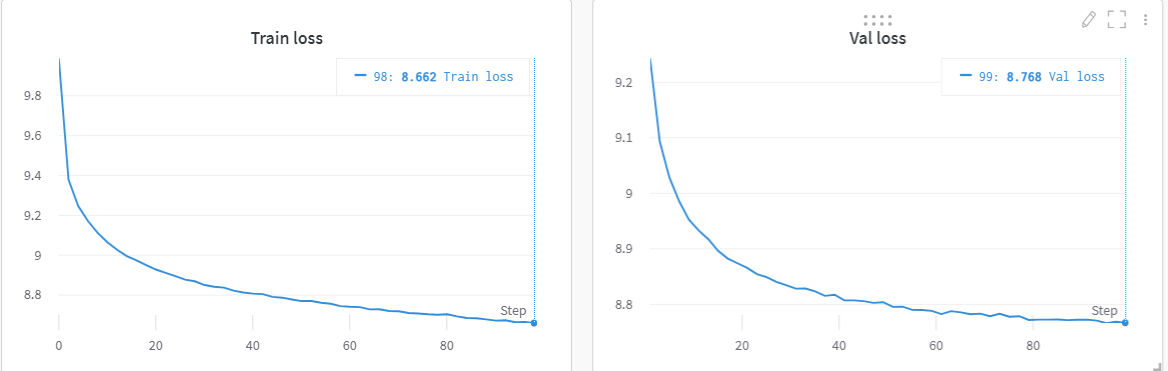

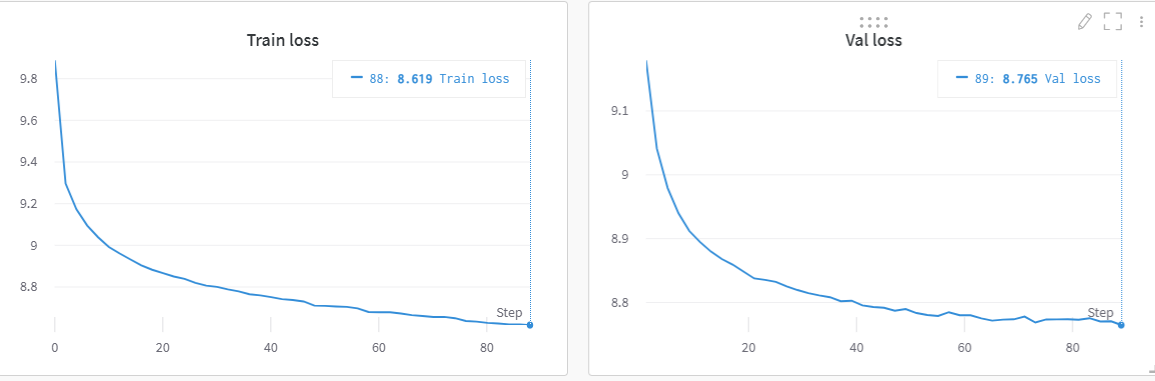

Резюмируя всё вышенаписанное, важными изменениями при подборе гиперпараметров стали:
<br>
1) смена оптимизатора с SGD(lr=0.001, momentum = 0.9) на Adam c lr = 0.0001
<br>
2) смена batch_size c 64 на 128
<br>
3) добавление ещё одного блока (с 3 блоков на 4)
<br>
4) увеличение количества эпох
<br>
Смена функций активации и незначительные изменения в кол-ве нейронов на выход в линейном слое (например, с 90-100 на 90-110), а также значений для дропаутов (с 0.1 на 0.2, например) особых изменений не давали
